### Deep Q-learning solution

$\epsilon$-greedy policy  

TD(0) update (neural network loss function):  
![network_loss](images/dqn_loss.png)  
with  

![return](images/return_definition.png)  

**Hyperparameters:**  
*   $\alpha$ (alpha) is the learning rate (0<$\Large \alpha$<=1) 
*   $\gamma$ (gamma) is the discount factor ($0 \leq \gamma \leq 1$) - determines how much importance we want to give to future rewards. A high value for the discount factor (close to 1) captures the long-term effective award, whereas, a discount factor of 0 makes our agent consider only immediate reward, hence making it greedy.
*   $\epsilon$ (epsilon) is the probability of random action. In our case we start from full exploration (epsilon=1.0) and decrease the value to epsilon_min (=0.01) as episodes pass.

Converges after ~600 iterations, with lr=0.001

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 9]
from lunar_lander_dqn import DQN, create_env

In [ ]:
env = create_env()
agent = DQN(env, alpha=0.001, gamma=.99, epsilon=1.0, epsilon_min=.01, epsilon_max=1.0, epsilon_decay=0.996, batch_size=64)
reward = agent.train(600)

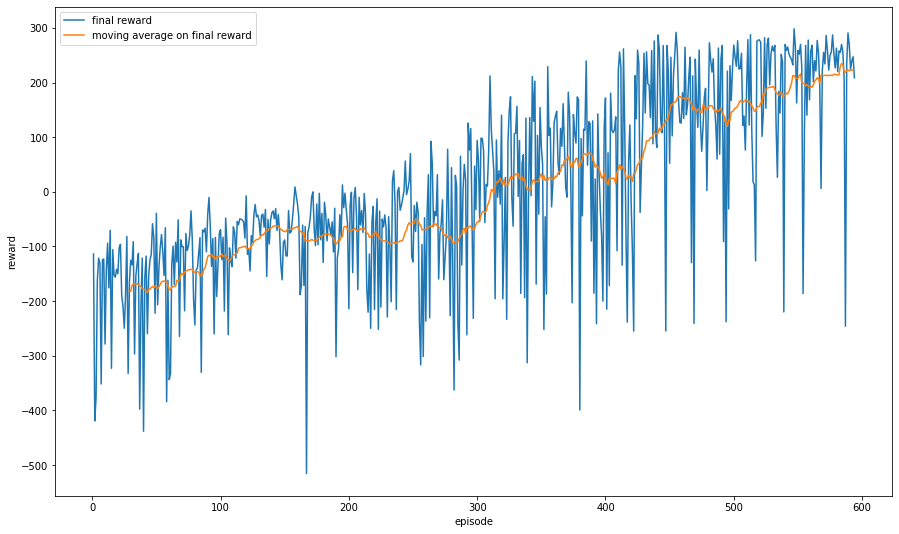

In [29]:
reward = np.load(r'dqn_reward_600.npy')
freq = 1
plt.plot(np.arange(1, len(reward)+1, freq), reward[::freq], label='final reward')
window = 30
plt.plot(pd.DataFrame(reward).rolling(window).mean(), label='moving average on final reward')
plt.xlabel('episode')
plt.ylabel('reward')
plt.legend()
plt.show();

---

### Note: Excecute evaluation in the terminal (TF multi-threading issues with IPython kernel).
python evaluate_dqn.py -c checkpoints\dqn_e100.h5 -e 1 --render  
python evaluate_dqn.py -c checkpoints\dqn_e300.h5 -e 1 --render  
python evaluate_dqn.py -c checkpoints\dqn_e1000.h5 -e 5 --render  